In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Phoneme Dataset
Load the phoneme dataset using Pandas

In [2]:
data = pd.read_csv('data/phoneme.csv')
print(data)

# DONE 
# Split the dataset into a train and test dataset according to column "speaker".
# Be sure to exclude row number, "speaker" and response columns from your features.

      row.names       x.1       x.2       x.3       x.4       x.5       x.6  \
0             1   9.85770   9.20711   9.81689   9.01692   9.05675   8.92518   
1             2  13.23079  14.19189  15.34428  18.11737  19.53875  18.32726   
2             3  10.81889   9.07615   9.77940  12.20135  12.59005  10.53364   
3             4  10.53679   9.12147  10.84621  13.92331  13.52476  10.27831   
4             5  12.96705  13.69454  14.91182  18.22292  18.45390  17.25760   
...         ...       ...       ...       ...       ...       ...       ...   
4504       4505  11.38394  10.21040  16.32658  18.30125  16.91804  10.90029   
4505       4506  12.01774  11.86761  16.34707  18.05214  15.97599  12.86022   
4506       4507  12.30174  12.40383   9.06497  12.43750  13.48388  13.52034   
4507       4508   8.39388   9.84770  16.24534  17.35311  14.80537  12.72429   
4508       4509   8.14032   9.93753  16.30187  17.31425  14.40116  13.52353   

           x.7       x.8       x.9  ...     x.249  

In [3]:
data_train = data.iloc[0:3340]
X_train = data_train.loc[:, ~data_train.columns.isin(['row.names', 'speaker', 'g'])]
print(X_train)

           x.1       x.2       x.3       x.4       x.5       x.6       x.7  \
0      9.85770   9.20711   9.81689   9.01692   9.05675   8.92518  11.28308   
1     13.23079  14.19189  15.34428  18.11737  19.53875  18.32726  17.34169   
2     10.81889   9.07615   9.77940  12.20135  12.59005  10.53364   8.54693   
3     10.53679   9.12147  10.84621  13.92331  13.52476  10.27831   8.97459   
4     12.96705  13.69454  14.91182  18.22292  18.45390  17.25760  17.79614   
...        ...       ...       ...       ...       ...       ...       ...   
3335   8.71574   6.63970  16.13753  17.59480  15.84771  13.73761  19.23975   
3336  12.09090  12.07206  15.06150  17.91977  17.37121  13.15412  13.50169   
3337  11.62867  11.51609  11.89907  11.93342  11.95919   9.44128   7.12836   
3338  12.08473  13.30547  16.92965  17.14066  13.09360  17.26574  19.11256   
3339  12.50446  13.94449  16.18002  16.87066  11.25393  16.60865  17.89792   

           x.8       x.9      x.10  ...     x.247     x.248    

In [4]:
data_test = data.iloc[3340:4509]
X_test = data_test.loc[:, ~data_train.columns.isin(['row.names', 'speaker', 'g'])]
print(X_test)

           x.1       x.2       x.3       x.4       x.5       x.6       x.7  \
3340   9.92796   9.74454   8.74148  10.31529  12.60091  13.20503  12.91027   
3341   9.94144  11.98050  11.22016  12.35993  18.01395  18.13849  15.14025   
3342  11.18442   6.66093  11.46921  13.76405  12.69276  10.20742  13.30959   
3343  10.72956  10.07414  10.24719  16.90955  18.79116  17.38038  11.32252   
3344  13.59457  13.10868  12.62661  15.38879  19.36268  19.04574  14.79668   
...        ...       ...       ...       ...       ...       ...       ...   
4504  11.38394  10.21040  16.32658  18.30125  16.91804  10.90029  17.10393   
4505  12.01774  11.86761  16.34707  18.05214  15.97599  12.86022  16.83436   
4506  12.30174  12.40383   9.06497  12.43750  13.48388  13.52034  12.97796   
4507   8.39388   9.84770  16.24534  17.35311  14.80537  12.72429  17.01145   
4508   8.14032   9.93753  16.30187  17.31425  14.40116  13.52353  16.85938   

           x.8       x.9      x.10  ...     x.247     x.248    

In [5]:
y_train = data.iloc[0:3340, 257]
print(y_train)

0        sh
1        iy
2       dcl
3       dcl
4        aa
       ... 
3335     iy
3336     aa
3337     sh
3338     ao
3339     ao
Name: g, Length: 3340, dtype: object


In [6]:
y_test = data.iloc[3340:4509, 257]
print(y_test)

3340     sh
3341     iy
3342    dcl
3343     aa
3344     iy
       ... 
4504     iy
4505     aa
4506     sh
4507     ao
4508     ao
Name: g, Length: 1169, dtype: object


### 2. LDA modelling
Fit an LDA model. Compute and report the train and test error.

In [7]:
# DONE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import zero_one_loss

LDA_model = LinearDiscriminantAnalysis()
LDA_classifier = LDA_model.fit(X_train, y_train)

train_score = LDA_classifier.score(X_train, y_train)
test_score = LDA_classifier.score(X_test, y_test)
print("The train score of LDA model is", train_score)
print("The test score of LDA model is", test_score)

y_pred_train = LDA_classifier.predict(X_train)
y_pred_test = LDA_classifier.predict(X_test)
print("The train error of LDA model is", zero_one_loss(y_train, y_pred_train))
print("The test error of LDA model is", zero_one_loss(y_test, y_pred_test))

The train score of LDA model is 0.9440119760479042
The test score of LDA model is 0.9195893926432849
The train error of LDA model is 0.05598802395209579
The test error of LDA model is 0.08041060735671512


### 3. LDA canonical coordinates
 Plot the projection of the training data onto the first two canonical coordinates of the LDA and report your findings. Investigate the data projected on further dimensions using the \texttt{dimen} parameter.

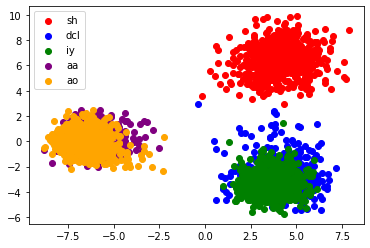

In [8]:
# DONE 
LDA_model_proj = LinearDiscriminantAnalysis(n_components=2)
projection = LDA_model_proj.fit_transform(X_train, y_train)

plt.scatter(projection[:, 0][y_train == 'sh'],
            projection[:, 1][y_train == 'sh'],
           marker='o',
           color='red',
           label='sh')
plt.scatter(projection[:, 0][y_train == 'dcl'],
            projection[:, 1][y_train == 'dcl'],
           marker='o',
           color='blue',
           label='dcl')
plt.scatter(projection[:, 0][y_train == 'iy'],
            projection[:, 1][y_train == 'iy'],
           marker='o',
           color='green',
           label='iy')
plt.scatter(projection[:, 0][y_train == 'aa'],
            projection[:, 1][y_train == 'aa'],
           marker='o',
           color='purple',
           label='aa')
plt.scatter(projection[:, 0][y_train == 'ao'],
            projection[:, 1][y_train == 'ao'],
           marker='o',
           color='orange',
           label='ao')
plt.legend()
plt.show()

### 4. LDA on "aa", "ao"
Select the two phonemes "aa" and "ao". Fit an LDA model on this data set and repeat the steps
    done in (2).

In [9]:
data_train_aaao = data_train.loc[(data_train['g'] == 'aa') | (data_train['g'] == 'ao')]
X_train_aaao = data_train_aaao.loc[:, ~data_train_aaao.columns.isin(['row.names', 'speaker', 'g'])]
print(X_train_aaao)

           x.1       x.2       x.3       x.4       x.5       x.6       x.7  \
4     12.96705  13.69454  14.91182  18.22292  18.45390  17.25760  17.79614   
6     10.95324  11.20585  16.17634  18.59300  17.50922  10.27798  16.00151   
8      9.37324  11.29505  17.15139  18.03336  14.95980  14.97031  18.63124   
9      9.48477  11.38758  16.74884  17.36141  14.67661  15.02621  18.28174   
13    11.62344  15.35490  18.85450  18.85172  14.21326  18.52945  20.11413   
...        ...       ...       ...       ...       ...       ...       ...   
3328   9.74357  15.23026  17.46805  16.23189  15.73793  18.47689  17.85606   
3333  11.64146  12.25616  17.04220  18.17339  15.47619  15.25918  19.29400   
3336  12.09090  12.07206  15.06150  17.91977  17.37121  13.15412  13.50169   
3338  12.08473  13.30547  16.92965  17.14066  13.09360  17.26574  19.11256   
3339  12.50446  13.94449  16.18002  16.87066  11.25393  16.60865  17.89792   

           x.8       x.9      x.10  ...     x.247    x.248    x

In [10]:
data_test_aaao = data_test.loc[(data_test['g'] == 'aa') | (data_test['g'] == 'ao')]
X_test_aaao = data_test_aaao.loc[:, ~data_test.columns.isin(['row.names', 'speaker', 'g'])]
print(X_test_aaao)

           x.1       x.2       x.3       x.4       x.5       x.6       x.7  \
3343  10.72956  10.07414  10.24719  16.90955  18.79116  17.38038  11.32252   
3345   8.76154   8.10672   9.51957  16.67524  17.88041  15.69150  10.75864   
3347  10.73904   6.17897  12.87199  17.02351  17.05646  13.69771   9.88330   
3352  15.11909  15.28254  16.77457  18.21454  18.21510  15.51225  17.30249   
3354  13.24060  13.25505  13.69984  18.27653  17.59943  14.89266  15.09513   
...        ...       ...       ...       ...       ...       ...       ...   
4497  12.38789  13.43828  16.84267  17.86295  14.64615  15.39920  18.40444   
4502   9.42752  10.25236  16.93746  18.67321  17.07761  12.13760  17.42284   
4505  12.01774  11.86761  16.34707  18.05214  15.97599  12.86022  16.83436   
4507   8.39388   9.84770  16.24534  17.35311  14.80537  12.72429  17.01145   
4508   8.14032   9.93753  16.30187  17.31425  14.40116  13.52353  16.85938   

           x.8       x.9      x.10  ...     x.247     x.248    

In [11]:
y_train_aaao = y_train.loc[(y_train == 'aa') | (y_train == 'ao')]
print(y_train_aaao)

4       aa
6       aa
8       ao
9       ao
13      aa
        ..
3328    ao
3333    aa
3336    aa
3338    ao
3339    ao
Name: g, Length: 1278, dtype: object


In [12]:
y_test_aaao = y_test.loc[(y_test == 'aa') | (y_test == 'ao')]
print(y_test_aaao)

3343    aa
3345    aa
3347    ao
3352    aa
3354    aa
        ..
4497    ao
4502    aa
4505    aa
4507    ao
4508    ao
Name: g, Length: 439, dtype: object


In [13]:
# DONE
LDA_model = LinearDiscriminantAnalysis()
LDA_classifier_aaao = LDA_model.fit(X_train_aaao, y_train_aaao)

train_score = LDA_classifier_aaao.score(X_train_aaao, y_train_aaao)
test_score = LDA_classifier_aaao.score(X_test_aaao, y_test_aaao)
print("The train score of LDA model for aa and ao is", train_score)
print("The test score of LDA model for aa and ao is", test_score)

y_pred_train_aaao = LDA_classifier_aaao.predict(X_train_aaao)
y_pred_test_aaao = LDA_classifier_aaao.predict(X_test_aaao)
print("The train error of LDA model for aa and ao is", zero_one_loss(y_train_aaao, y_pred_train_aaao))
print("The test error of LDA model for aa and ao is", zero_one_loss(y_test_aaao, y_pred_test_aaao))

The train score of LDA model for aa and ao is 0.8935837245696401
The test score of LDA model for aa and ao is 0.785876993166287
The train error of LDA model for aa and ao is 0.10641627543035992
The test error of LDA model for aa and ao is 0.214123006833713


## 5. QDA
Repeat steps (b) and (d) using QDA and report your findings. Would you prefer LDA or QDA in this example? Why?

In [14]:
# DONE
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA_model = QuadraticDiscriminantAnalysis()
QDA_classifier = QDA_model.fit(X_train, y_train)

train_score = QDA_classifier.score(X_train, y_train)
test_score = QDA_classifier.score(X_test, y_test)
print("The train score of QDA model is", train_score)
print("The test score of QDA model is", test_score)

y_pred_train = QDA_classifier.predict(X_train)
y_pred_test = QDA_classifier.predict(X_test)
print("The train error of QDA model is", zero_one_loss(y_train, y_pred_train))
print("The test error of QDA model is", zero_one_loss(y_test, y_pred_test))

The train score of QDA model is 1.0
The test score of QDA model is 0.8417450812660393
The train error of QDA model is 0.0
The test error of QDA model is 0.1582549187339607


In [15]:
QDA_model = QuadraticDiscriminantAnalysis()
QDA_classifier_aaao = QDA_model.fit(X_train_aaao, y_train_aaao)

train_score = QDA_classifier_aaao.score(X_train_aaao, y_train_aaao)
test_score = QDA_classifier_aaao.score(X_test_aaao, y_test_aaao)
print("The train score of QDA model for aa and ao is", train_score)
print("The test score of QDA model for aa and ao is", test_score)

y_pred_train_aaao = QDA_classifier_aaao.predict(X_train_aaao)
y_pred_test_aaao = QDA_classifier_aaao.predict(X_test_aaao)
print("The train error of QDA model for aa and ao is", zero_one_loss(y_train_aaao, y_pred_train_aaao))
print("The test error of QDA model for aa and ao is", zero_one_loss(y_test_aaao, y_pred_test_aaao))

The train score of QDA model for aa and ao is 1.0
The test score of QDA model for aa and ao is 0.6605922551252847
The train error of QDA model for aa and ao is 0.0
The test error of QDA model for aa and ao is 0.33940774487471526


*Answer*
* For this example, LDA is better. Even though QDA has R-squared value 1.0 for training data (higher than LDA has: 0.95 and 0.89) but only 0.84 and 0.66 for testing data (lower than LDA has: 0.92 and 0.79)

## 6. Confusion Matrices
Generate confusion matrices for the LDA and QDA model for "aa" and "ao". Which differences can you observe between the models?

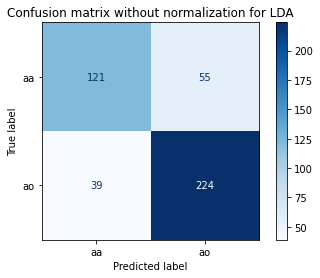

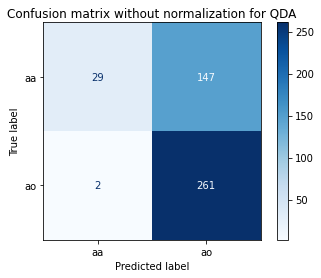

In [16]:
# TODO 
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(
        LDA_classifier_aaao,
        X_test_aaao,
        y_test_aaao,
        cmap=plt.cm.Blues,
    )
disp.ax_.set_title('Confusion matrix without normalization for LDA')
plt.show()

disp = ConfusionMatrixDisplay.from_estimator(
        QDA_classifier_aaao,
        X_test_aaao,
        y_test_aaao,
        cmap=plt.cm.Blues,
    )
disp.ax_.set_title('Confusion matrix without normalization for QDA')
plt.show()

*Answer*
* LDA (training error 21.4%) predicts more correctly than QDA (training error 33.9%).
* For positive aa, LDA has much higher sensitivity (68.8% compare to 16.5% of QDA) but lower specificity (85.2% compare to 99.2% of QDA).
* LDA has less wrong predictions when true label is aa. QDA has less wrong predictions when true label is ao.